In [4]:
import datasets as ds
import re

In [2]:
import sys
sys.path.append("../llm-reasoning-metric")

In [3]:
import verl_reward as vr

In [8]:
# This should work - using re.DOTALL flag to match newlines
match = re.search(r'<think>(.*)</think>', inputs, re.DOTALL)
if match:
    print(f"Found match: '{repr(match.group(1))}'")
    print(f"Match group 0: '{repr(match.group(0))}'")


NameError: name 're' is not defined

In [6]:
inputs = """
<think>

bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla

bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla

bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla



</think>

<answer>

'Chosen: A'

</answer>
""".strip()

vr.reward_router(data_source="mt-ranking", solution_str=inputs, ground_truth="A", extra_info={"reasoning_effort": "none"})

2.08

In [2]:
data = ds.load_dataset("Rexhaif/wmt-metrics-19-24")['train']

In [3]:
data.to_pandas().query('score_name == "mqm" and lp == "zh-en"')['score'].describe()

count    63463.000000
mean        -3.671588
std          5.483038
min        -80.000000
25%         -5.000000
50%         -1.000000
75%         -0.000000
max         -0.000000
Name: score, dtype: float64

In [42]:
data_mqm = data.filter(lambda x: x['score_name'] == 'mqm')
data_rest = data.filter(lambda x: x['score_name'] != 'mqm')

In [43]:
mqm_enru = data_mqm.filter(lambda x: x['lp'] == 'en-ru')
mqm_rest = data_mqm.filter(lambda x: x['lp'] != 'en-ru')

In [44]:
mqm_enru = mqm_enru.filter(lambda x: x['score'] >= -0.0)
mqm_rest = mqm_rest.map(lambda x: {
    'score': x['score'] if x['score'] > -25.0 else -25.0,
})

Filter:   0%|          | 0/36625 [00:00<?, ? examples/s]

In [45]:
mqm_enru = mqm_enru.map(lambda x: {
    'score': (x['score'] / 4.0) - 25.0,
})

Map:   0%|          | 0/24347 [00:00<?, ? examples/s]

array([[<Axes: title={'center': 'score'}>]], dtype=object)

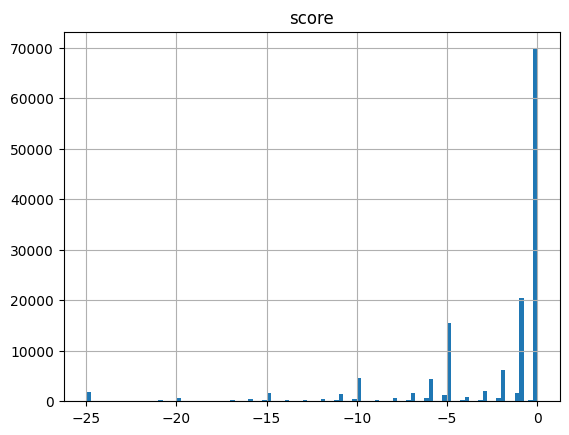

In [46]:
mqm_rest.to_pandas().hist(column='score', bins=100)

array([[<Axes: title={'center': 'score'}>]], dtype=object)

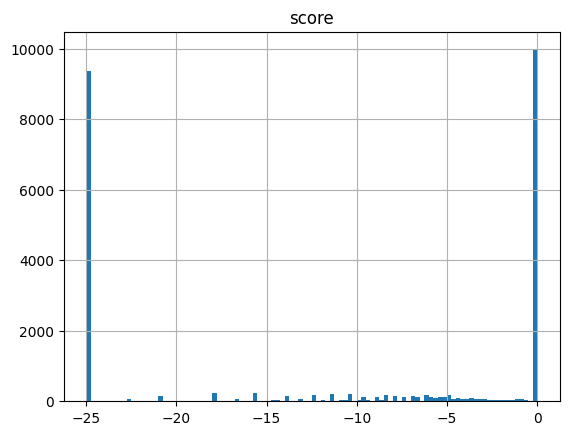

In [47]:
mqm_enru.to_pandas().hist(column='score', bins=100)